In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F
import time

In [13]:
# Check if a GPU is available
if torch.cuda.is_available():
    # Create a device object for the GPU
    device = torch.device('cuda')
else:
    # Create a device object for the CPU
    device = torch.device('cpu')
device

device(type='cuda')

In [14]:
cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


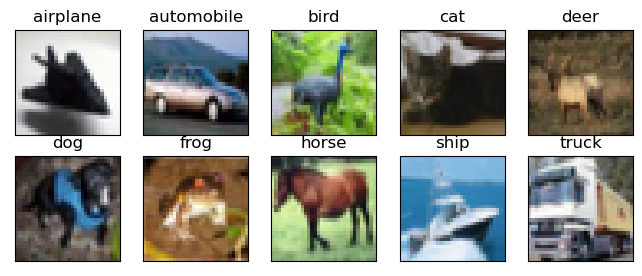

In [15]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [16]:
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [17]:
cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [13]:
start_time = time.time()
torch.cuda.empty_cache()
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = Net()

model = model.to(device)

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 300

one_epochs = []
one_loss = []

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        torch.cuda.empty_cache()
        loss.backward()
        optimizer.step()

    one_epochs.append(epoch)
    one_loss.append(float(loss))
    if epoch % 30 == 0 or epoch == 299:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
end_time = time.time()
elapsed = end_time - start_time
print("Training Time was:", elapsed, "seconds.")

Epoch: 0, Loss: 2.242001
Epoch: 30, Loss: 1.290572
Epoch: 60, Loss: 1.265949
Epoch: 90, Loss: 1.940292
Epoch: 120, Loss: 1.384184
Epoch: 150, Loss: 1.024206
Epoch: 180, Loss: 1.171630
Epoch: 210, Loss: 0.898568
Epoch: 240, Loss: 0.695714
Epoch: 270, Loss: 0.770087
Epoch: 299, Loss: 1.029038
Training Time was: 2442.7290267944336 seconds.


In [16]:
# Printing training accuracy
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        torch.cuda.empty_cache()
        
print("Training Accuracy: %f" % (correct / total))

# Printing Validation accuracy
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        torch.cuda.empty_cache()
        
print("Validation Accuracy: %f" % (correct / total))

Training Accuracy: 0.712380
Validation Accuracy: 0.643000


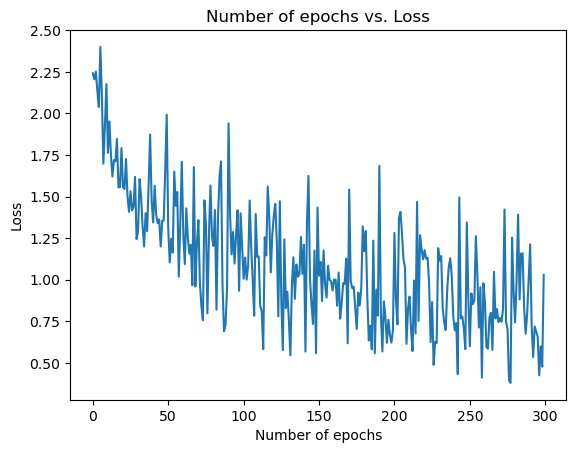

In [17]:
plt.figure(1)
plt.plot(one_epochs, one_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Number of epochs vs. Loss")
plt.show()

In [22]:
class Net_Two(nn.Module):
    def __init__(self):
        super(Net_Two, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 32)
        self.conv3 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc3 = nn.Linear(8 * 8 * 8, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        out = F.max_pool2d(torch.relu(self.conv3(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv4(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc3(out))
        out = self.fc4(out)
        return out

In [25]:
start_time = time.time()
torch.cuda.empty_cache()
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = Net_Two()

model = model.to(device)

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 300

two_epochs = []
two_loss = []

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        torch.cuda.empty_cache()
        loss.backward()
        optimizer.step()

    two_epochs.append(epoch)
    two_loss.append(float(loss))
    if epoch % 30 == 0 or epoch == 299:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
end_time = time.time()
elapsed = end_time - start_time
print("Training Time was:", elapsed, "seconds.")

Epoch: 0, Loss: 2.317952
Epoch: 30, Loss: 1.379970
Epoch: 60, Loss: 1.415629
Epoch: 90, Loss: 1.251784
Epoch: 120, Loss: 1.013512
Epoch: 150, Loss: 1.151579
Epoch: 180, Loss: 1.042346
Epoch: 210, Loss: 0.686884
Epoch: 240, Loss: 0.803449
Epoch: 270, Loss: 0.583186
Epoch: 299, Loss: 0.895143
Training Time was: 2443.4494988918304 seconds.


In [27]:
# Printing training accuracy
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        torch.cuda.empty_cache()
        
print("Training Accuracy: %f" % (correct / total))

# Printing Validation accuracy
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        torch.cuda.empty_cache()
        
print("Validation Accuracy: %f" % (correct / total))

Training Accuracy: 0.728260
Validation Accuracy: 0.655800


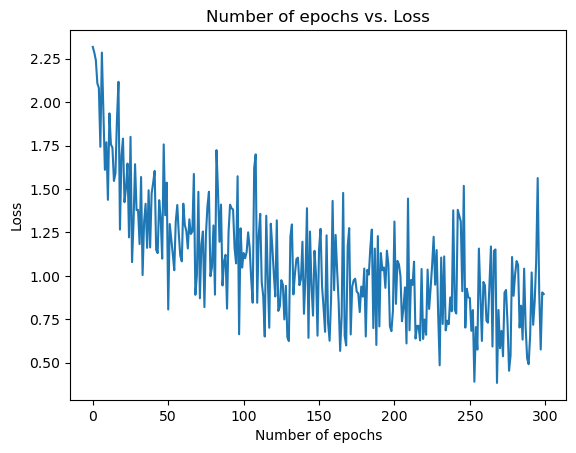

In [26]:
plt.figure(2)
plt.plot(two_epochs, two_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Number of epochs vs. Loss")
plt.show()